In [1]:
# to read the dataset
import pandas as pd

# for visualization
from matplotlib import pyplot as plt

# for date and time manipulaion
import datetime
from dateutil.parser import parse

# for map visualization
import plotly.express as px

In [2]:
# import dataset

uber_trips = pd.read_csv(r"C:\Users\Vincent Oloyede\Desktop\WTF'23\Uber Trips Analysis Project\Data\uber-raw-data-sep14.csv")

# display the first 5 rows
uber_trips.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
# display last 5 rows
uber_trips.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [4]:
# find shape of daatset
uber_trips.shape

(1028136, 4)

In [5]:
#understand the dataset properties
uber_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [6]:
# change datatype of Date/Time from object to DateTime
uber_trips['Date/Time'] = pd.to_datetime(uber_trips['Date/Time'])

#convert Date/Time column to Date-Time format
uber_trips['Day'] = uber_trips['Date/Time'].apply(lambda x:x.day)
uber_trips['Hour'] = uber_trips['Date/Time'].apply(lambda x:x.hour)
uber_trips['Week Day'] = uber_trips['Date/Time'].apply(lambda x:parse(str(x)).strftime('%A'))
uber_trips.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Week Day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,Monday
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,Monday
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,Monday
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,Monday
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,Monday


In [7]:
uber_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Day        1028136 non-null  int64         
 5   Hour       1028136 non-null  int64         
 6   Week Day   1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 54.9+ MB


In [8]:
# check for missing values

uber_trips.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
Day          0
Hour         0
Week Day     0
dtype: int64

In [9]:
uber_trips['Month'] = uber_trips['Date/Time'].apply(lambda x: parse(str(x.month)).strftime('%B'))
uber_trips.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Week Day,Month
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,Monday,November
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,Monday,November
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,Monday,November
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,Monday,November
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,Monday,November


In [10]:
uber_trips['Year'] = uber_trips['Date/Time'].apply(lambda x: x.year)
uber_trips.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Week Day,Month,Year
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,Monday,November,2014
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,Monday,November,2014
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,Monday,November,2014
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,Monday,November,2014
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,Monday,November,2014


In [11]:
uber_trips['Month'].unique()

array(['November'], dtype=object)

### Check Density of Rides over Time

Text(0, 0.5, 'Density of rides')

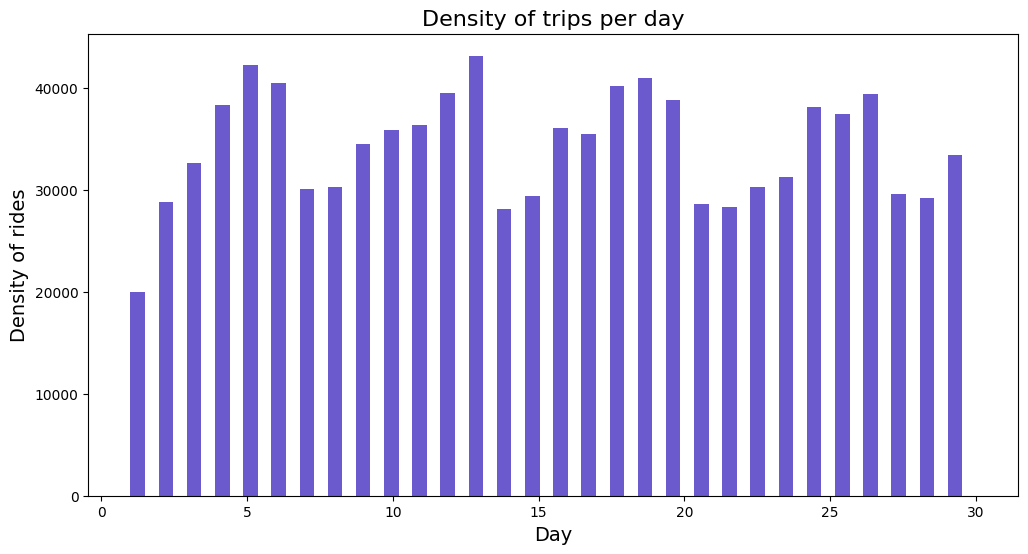

In [12]:
# Density of Rides per Day
fig, ax = plt.subplots(figsize= (12,6))
plt.hist(uber_trips['Day'], width= 0.5, bins= 30, color= 'slateblue')
plt.title("Density of trips per day", loc= 'center', fontsize= 16)
plt.xlabel('Day', fontsize= 14)
plt.ylabel('Density of rides', fontsize= 14)

**Inference:**
We can infer from the chart above that, the highest number of rides are during the weekdays and the least rides are mostly on sundays. This is confirmed below

Text(0, 0.5, 'Density of rides')

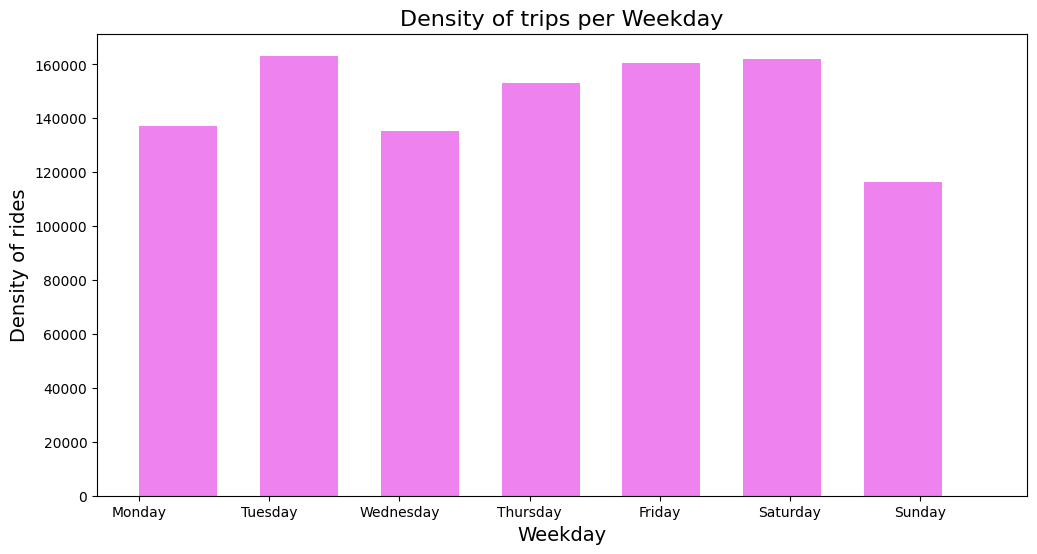

In [13]:
#visualize density of rides per weekday
fig, ax = plt.subplots(figsize = (12, 6))
plt.hist(uber_trips['Week Day'], width = 0.6, bins = 7, range=(0, 6.5), color = 'violet')
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

**Inference** 
We can also see here that the least rides are taken on sundays

Text(0, 0.5, 'Density of rides')

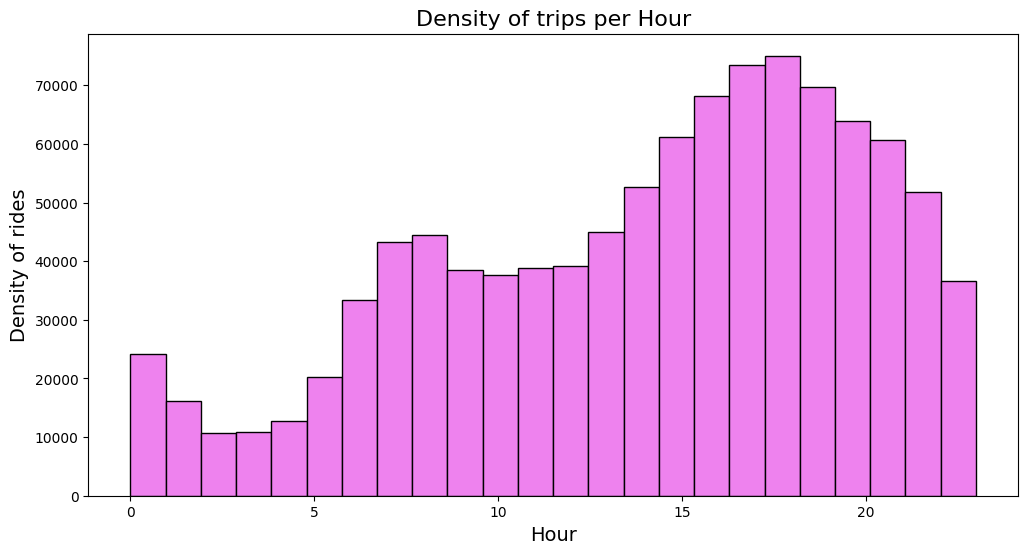

In [14]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.hist(uber_trips['Hour'], bins = 24, color = 'violet', edgecolor = 'black')
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

**Inference**
Number of Rides decrease from 12am to 3am and from there started to increase till 6pm, the 18th hour, and the hour with the highest number of rides

In [15]:
# show density of rides per location by plotting maps from longitude and latitude
fig = px.scatter_geo(uber_trips, lat=['Lat'], lon=['Lon'])
fig.update_layout(title= 'Density of Rides per Location, November, 2014', title_x= 1)
fig.show()

Text(0, 0.5, 'Longitude')

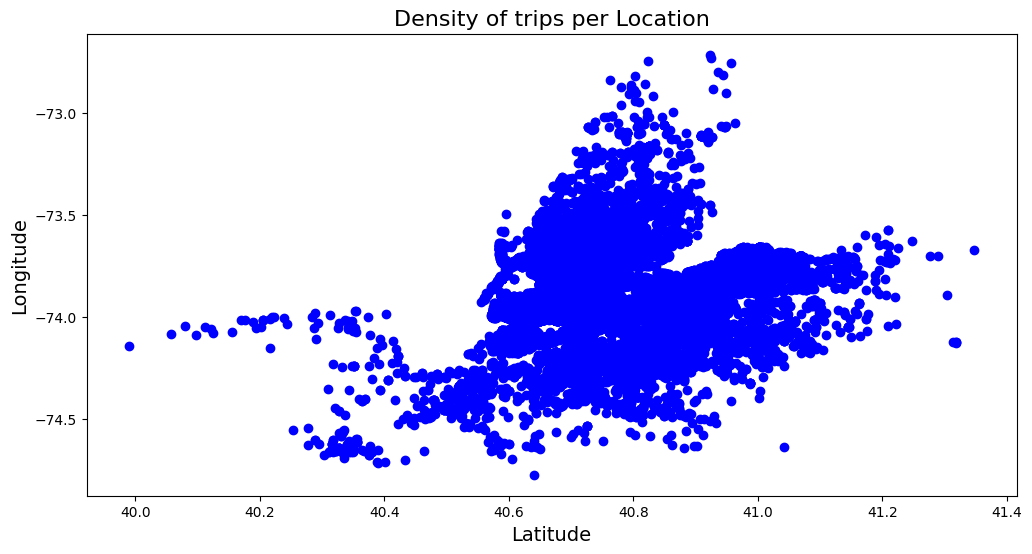

In [16]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_trips['Lat']
y= uber_trips['Lon']
plt.scatter(x, y, color= "blue")
plt.title("Density of trips per Location", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Longitude", fontsize=14)